<a href="https://colab.research.google.com/github/Yanni-Dhevictor/Projetos-de-Data-Science/blob/master/Analisando_os_Dados_do_Airbnb_Viagem_para_Alemanha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

Made by [Yanni Dhevictor](https://www.linkedin.com/in/yanni-dhevictor-a4b235174/)

---

# Análise dos Dados do Airbnb - *Berlim - Alemanha*

<center><img alt="Analisando Airbnb" width="80%" src="https://nit.pt/wp-content/uploads/2019/11/2bf9f011a8fd4d18eea52ce1e927783d.jpeg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


Um passeio por essa linda cidade lhe proporcionará uma visão sobre a história desse continente, onde momentos bons e ruins aconteceram e vidas foram mudadas.

Com seus edifícios, demonstrando o melhor da arquiterura alemã moderna e colorida em contraste com as histórias de um passado obscuro da cidade. 

O turismo pela majestosa Berlim, presenteia os visitantes de primeira visita com inúmeras atividades, visitas a pontos históricos e excursões em grupo ou sozinho e um sistema viário muito bem organizado. Não deixando esquecer das maravilhosas comidas típicas alemãs, como o *currywurst* e o *Schwäbische Maultaschen* .

<br>

<center><img alt ="Prato Currywurst" width = "40%" src= "https://images.eatsmarter.de/sites/default/files/styles/facebook/public/currywurst-mit-pommes-und-mayonnaise-50783.jpg">


<center><img alt = "Schwäbische Maultaschen" width = "40%" src= "https://www.lecker.de/assets/field/image/schwaebische-maultaschen-b.jpg">

<br>


**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlim na Alemanha, identificando os insights que podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Os dados utilizados para esse estudo está disponível no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa análise foi somente baixado o arquivo:

* `listings.csv` - *Summary information and metrics for listings in Berlim (good for visualisations).*

In [10]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2020-05-14/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* ... id - Número para identificar o imóvel
* ... name - Nome da propriedade
* ... host_id - Número de identificação do proprietário do imóvel
* ... neighbourhood_group - Não contém nenhum valor válido
* ... neighbourhood - Baírro onde se locativa o imóvel
* ... latitude - Coordenada de latitude do imóvel
* ... longitude - Coordenada de longitude do imóvel
* ... room_type - Informa o tipo de quarto oferecido
* ... price - Preço para o aluguél do imóvel
* ... minimum_nights - Número mínimo de noites para o aluguél do imóvel
* ... number_of_reviews - Número de avaliaçãoes feitas do imóvel
* ... last_review - Informa a data da última avaliação do imóvel
* ... reviews_per_month - Informa a quantidade de avaliações por mês
* ... calculated_host_listings_count - Quantidade de imóveis que o anfitrião possui
* ... availability_365 - Disponibilidade no período de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [12]:
# mostrar as 5 primeiras entradas
df.head()
#df['neighbourhood'].unique()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,60,4,132,2020-04-03,2.65,7,180
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.09,1,0
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.33,1,364
3,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.24,2,78
4,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.14,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Partindo para a identificação de entradas do conjunto de dados em questão, vamos analisar os tipos de dados em cada coluna.

Esse dataset é uma versão "resumida" do **Airbnb**. Há a disponibilidade para baixar a versão completa no mesmo site que essa versão foi retirada, a versão desse projeto contém 24678 entradas e 16 variáveis (`listings.csv.gz`). 



In [13]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 24678
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [14]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 18.380744
last_review                       18.380744
name                               0.202610
host_name                          0.085096
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

É possível notar que os valores `reviews_per_month` e `last_review`  possuem 18% de dados ausentes, por isso eles serão retirados, evitando que os dados mais importantes sejam comprometidos ou ocultados.

In [16]:
#Excluindo as colunas reviews_per_month e last_review
df_clean = df.drop(columns=['reviews_per_month','last_review'])

### **Q3. Qual o tipo de distribuição das variáveis?** 

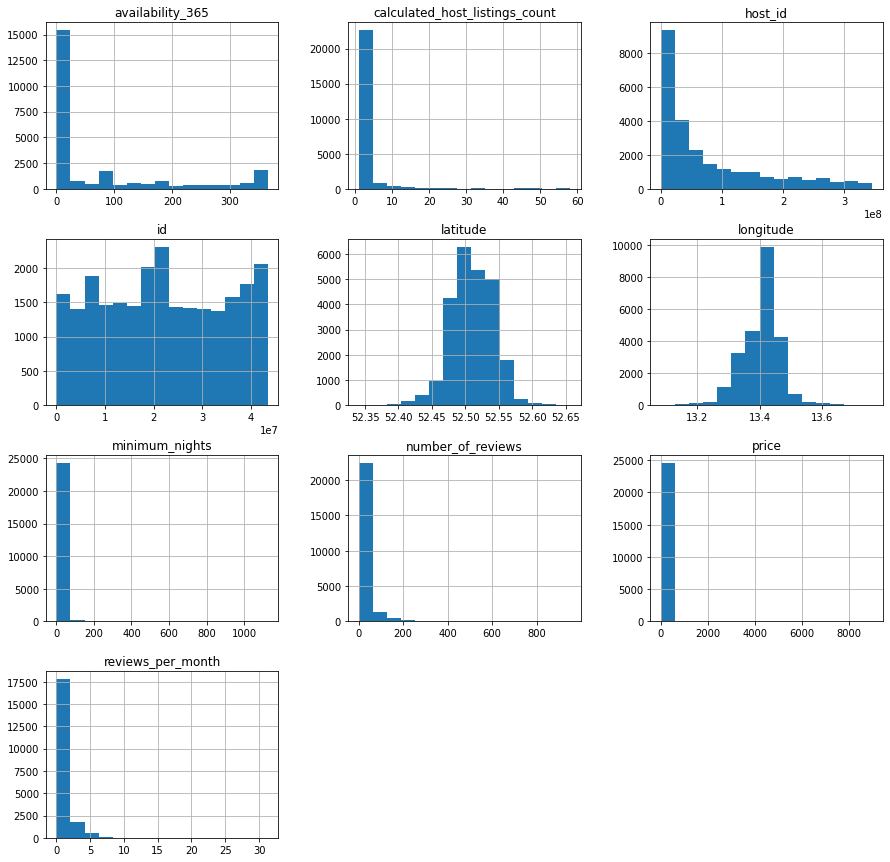

In [17]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,15));

####**Retirada de outliers**

Com base nos dados mostrados, podem ser identificados valores que podem comprometer a fidelidade e a qualidade do resultado que se procura obter neste dataset. Para isso, é necessário identificar e retirar os outliers presentes como nas variaveis `price` e  `minimum_nights` .

''Para a retirada desses outliers, podemos usar boxplots ou o resumo estatístico por meio do uso do `describe()`''

In [18]:
#Retirando os outliers em price
price_0 = df_clean[df_clean['price']==0].index

df_clean.drop(index=price_0,inplace=True)

In [19]:
#Verificando se existem valores discrepantes por meio da média, mediana e desvio padrão

print("Media: {}".format(df_clean['price'].mean()))
print("Mediana: {}".format(df_clean['price'].median()))
print("Desvio Padrão: {}\n".format(df_clean['price'].std()))

Media: 75.13681138270704
Mediana: 50.0
Desvio Padrão: 240.0288371868505



Foi percebido que existem valores que extrapolam tanto na media quanto no desvio padrão.
com o uso do **Boxplot** será mais fácil a visualização desses valores.

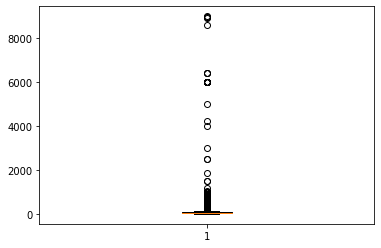

Valores acima de 150: 1270
% acima de 150: 5.148161660383478


In [20]:
plt.boxplot(x=df_clean['price'])
plt.show()

print("Valores acima de 150: {}".format(len(df_clean[df_clean['price']>150])))
print("% acima de 150: {}".format(len(df_clean[df_clean['price']>150])*100/df_clean.shape[0]))

A partir dos dados identificados no gráfico acima, boa parte dos valores catalogados, se encontram abaixo de 150 euros, representando aproximadamente 94% de preços abaixo desse limite determinado. Os valores acima de 150 serão removidos. Ou seja será retirado 5,14% do dataset analisado.

In [21]:
price_150 = df_clean.loc[df_clean['price']<=150].shape[0] * 100 / df_clean.shape[0]

print("% menor € 150: {}".format(round(price_150,2))) 

% menor € 150: 94.85


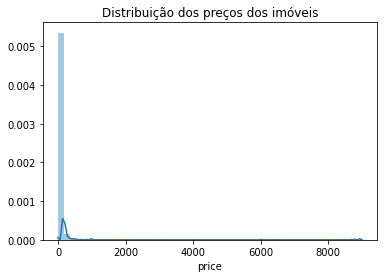

In [22]:
sns.distplot(df_clean['price'])
plt.title("Distribuição dos preços dos imóveis");

In [23]:
# Remoção dos outliers existentes em price

otl_price = df_clean.loc[df_clean['price']>150].index
df_clean.drop(index=otl_price,inplace=True)

In [24]:
print("Media: {}".format(df_clean['price'].mean()))
print("Mediana: {}".format(df_clean['price'].median()))
print("Desvio padrão: {}".format(df_clean['price'].std()))

Media: 55.66468652506517
Mediana: 49.0
Desvio padrão: 30.14114666964011


In [25]:
#Analisando o resumo estatístico das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000
mean,75.109409,7.394035,20.983305,2.511468,75.013615
std,239.989351,27.988944,45.607124,5.652053,118.603012
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,35.000000,2.000000,1.000000,1.000000,0.000000
50%,50.000000,3.000000,5.000000,1.000000,0.000000
75%,79.000000,4.000000,18.000000,2.000000,108.000000
max,9000.000000,1124.000000,950.000000,58.000000,365.000000


Obsevando o gráfico estátístico é possível realizar um exame das seguintes informações:

* A variável `price` possui 75% do valor abaixo de 79, porém seu valor máximo é 9000.
* A quantidade mínima de noites (`minimum_nights`) está alcançando um valor médio de 7 dias.



### **Q4. Qual a média dos preços de aluguel?**

In [26]:
# ver a média da coluna price
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt     86.566400
Hotel room         913.320988
Private room        44.370318
Shared room         74.439344
Name: price, dtype: float64

Aqui podemos identificar que o preço médio para os seguintes imóveis:

* `Entire home/apt` - (Apartamento inteiro) : € 86.56 (Euros) equivalente a 512.67 reais brasileiros.
* `Hotel room` - (Quarto de hotel) : € 913.32 (Euros) equivalente a 5409.41 reais brasileiros.
* `Private room` - (Quarto privado) : € 44.37 (Euros) equivalente a 262.53 reais brasileiros.
* `Shared room` - (Quarto compartilhado) : € 74.43 (Euros) equivalente a 440.46 reais brasileiros.

### **Q5. Qual a correlação existente entre as variáveis**

Nessa etapa do processo de análise dos dados, será feito um processo de correlação entre os dados, como atributos diferentes ao sofrerem variações demonstram comportamentos parecidos, não significando necessáriamente uma relação de causa e efeito.
Para isso será utilizado uma matriz de nome `heatmap`, possibilitando a visualização de forma mais clara.

In [31]:
# criar uma matriz de correlação
corr = df_clean[['name','host_id','neighbourhood','room_type','minimum_nights','number_of_reviews','availability_365','price']].corr()

# mostrar a matriz de correlação
corr

,host_id,minimum_nights,number_of_reviews,availability_365,price
host_id,1.000000,-0.025602,-0.115459,0.073263,0.012704
minimum_nights,-0.025602,1.000000,-0.032972,0.135390,-0.004687
number_of_reviews,-0.115459,-0.032972,1.000000,0.265576,0.077294
availability_365,0.073263,0.135390,0.265576,1.000000,0.192577
price,0.012704,-0.004687,0.077294,0.192577,1.000000


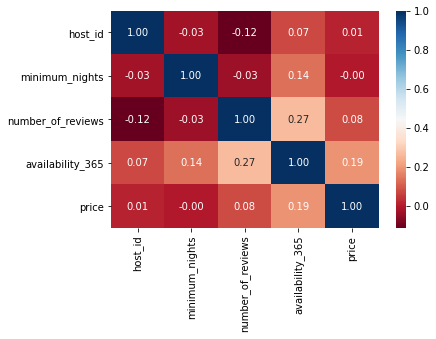

In [34]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,annot=True,cmap="RdBu",fmt='.2f');

De acordo com o mapa de calor, não existem tantos valores que podem ser levados em consideração, como no caso de `avaliability_365` com `number_of_reviews`, significando somente que existem uma certa correlação entre a quantidade de reviews de um imóvel com a quantidade de dias que a mesma está disponível no período de 1 ano.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Para poder identificar o tipo de imóvel mais alugado em Berlim, será utilizado o método `value_counts()` que irá separar os tipos de imóveis pelo `room_type`.



In [39]:
# mostrar a quantidade de cada tipo de imóvel disponível
imoveis =  df_clean['room_type'].value_counts()
imoveis

Entire home/apt    11737
Private room       11264
Shared room          290
Hotel room           108
Name: room_type, dtype: int64

Com esse resultado é possível notar que os viajantes tendem a alugar mais imóveis que possibilitem a sua privacidade, seja viajando sozinho ou acompanhado, como os imóveis onde todo o imóvel está sendo alugado, como uma casa ou um apartamento ou onde somente o quarto é privado. Além de que não buscam gastar muito em imóveis quando o verdadeiro objetivo de viajar é conhecer o local onde você está viajando, que nesse caso é Berlim.

No resultado abaixo, confirma-se em portencagem uma predominância na qual imóveis inteiros(representando 50.16% do total) e quartos privados(48.13% do total) podem ser alugados.

In [42]:
# mostrar a porcentagem de cada tipo de imóvel disponível
((imoveis / df_clean.shape[0])*100).round(2)


Entire home/apt    50.16
Private room       48.14
Shared room         1.24
Hotel room          0.46
Name: room_type, dtype: float64

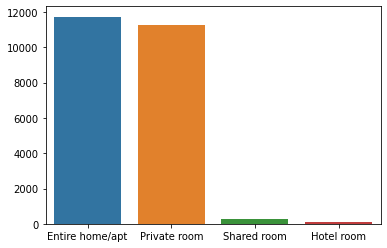

In [50]:
sns.barplot(imoveis.index,imoveis.values);

### **Q7. Qual a localidade mais cara de Berlim?**



Nessa penultima parte da análise de dados os locais mais caros serão separados por bairro. Sendo possível ver quais os bairros que possuem localidades com um valor menor acessível, pelo menos para o viajante que quer gastar pouco.

In [54]:
# Catalogando os preços por bairros, na média
group_bairros = df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

group_bairros

neighbourhood
Regierungsviertel                            78.838542
Brunnenstr. Süd                              76.076537
Alexanderplatz                               74.474275
Rahnsdorf/Hessenwinkel                       74.142857
Schmöckwitz/Karolinenhof/Rauchfangswerder    72.050000
Marzahn-Süd                                  70.625000
Prenzlauer Berg Südwest                      69.939086
Helmholtzplatz                               67.376940
Rummelsburger Bucht                          67.205882
Halensee                                     67.186047
Name: price, dtype: float64

Em uma visualização gráfica, esses dados ficam da seguinte forma.

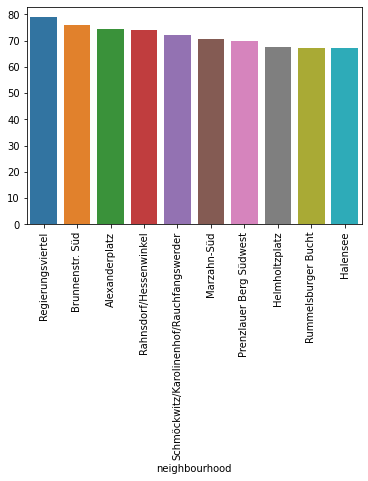

In [57]:
sns.barplot(group_bairros.index[:15],group_bairros.values[:15])
plt.xticks(rotation=90);

Essa dispersão no mapa de Berlim, pode ser representado da seguinte forma.

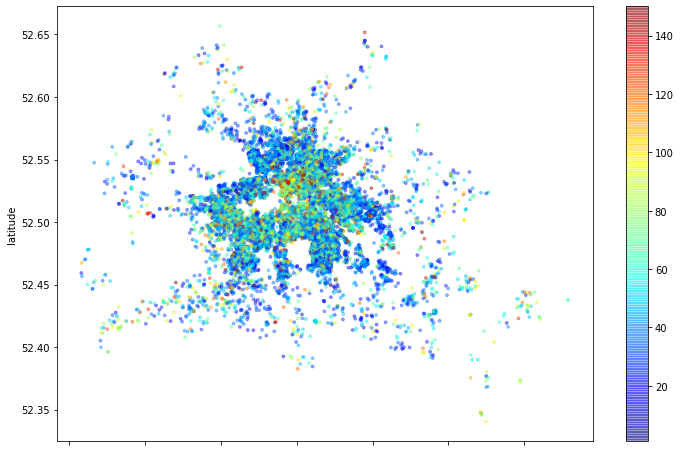

In [59]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude',y='latitude', alpha=0.4,c=df_clean['price'],
              s=8,cmap=plt.get_cmap('jet'),figsize=(12,8));

<img alt="Mapa de Berlim" width="60%" src= "https://pt.berlinmap360.com/website/var/tmp/image-thumbnails/0/615/thumb__map/mapa-bairros-berlim.pjpeg"></left>


### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Nessa seção é demonstrado o número médio mínimo de dia que a pessoa deverá ficar hospedada, separado por bairros.

In [80]:
# ver a média da coluna `minimum_nights`

#df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

grp_mns=df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)
grp_mns

neighbourhood
Wilhelmstadt                          22.694444
Brunsbütteler Damm                    22.250000
Bohnsdorf                             20.937500
Kurfürstendamm                        18.235772
West 4                                16.382353
                                        ...    
Altstadt-Kietz                         1.666667
MV 1                                   1.533333
Hellersdorf-Süd                        1.333333
Neu-Hohenschönhausen Nord              1.250000
Malchow, Wartenberg und Falkenberg     1.250000
Name: minimum_nights, Length: 136, dtype: float64

## Conclusões


Em resumo, foi feita uma análise dos dados disponibilizados pelo Airbnb dos imóveis disponíveis para aluguél na cidade de Berlim na Alemanha, no qual foram feitas as obtenções das informações presentes, retirando os outliers e dados que comprometeriam a fidelidade do dado com a realidade.

Em resumo, foram destacados os seguintes pontos:

* Os aluguéis em geral são feitos para ficarem 1 semana no imóvel escolhido;
* Os imóveis alugados com mais frequência são os que oferecem todo o apartamento/casa e os aluguéis de quartos privados;
* E que os 3 locais mais caros para se realizar um aluguel de imóvel são  **Regierungsviertel** - (78.83 Euros), **Brunnenstr. Süd** - (76.07 Euros), **Alexanderplatz** -(74.47 Euros). 


<img alt="Alerta de fim" width="60%" src= "http://annyas.com/screenshots/images/1956/backlash-the-end.jpg"></center>
